[https://www.tensorflow.org/tutorials/generative/style_transfer](https://www.tensorflow.org/tutorials/generative/style_transfer)

In [ ]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'


In [ ]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools


In [ ]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)


In [ ]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://www.fit.vut.cz/person-photo/49413/?transparent=1')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')


195196/195196 [==============================] - 0s 0us/step


In [ ]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img


In [ ]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)


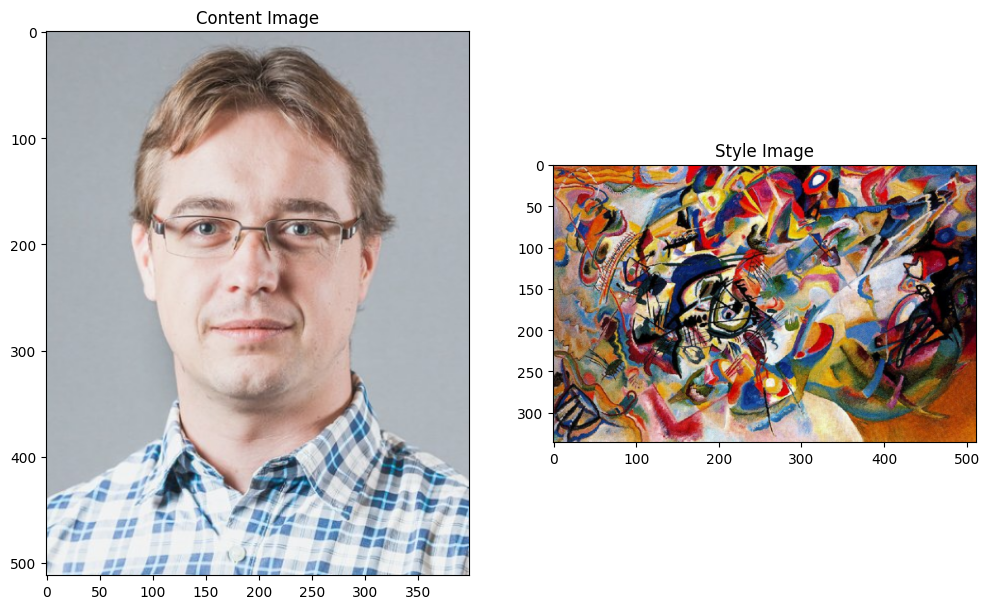

In [ ]:
content_image = load_img(content_path)
# content_image = load_img('hradis.jpeg')
style_image = load_img(style_path)
style_image = load_img('old2.png')

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import os
import PIL.Image
import numpy as np
from dataclasses import dataclass

def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

@dataclass
class Model:
  name: str
  url: str


neural_model = Model('neural_model', 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
fast_model = Model('fast_model', 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
hub_model = hub.load(fast_model)

original_images_dir = 'original_images'
style_images_dir = 'style_images'
altered_images_dir = 'altered_images'

# Iterate through styles.
for style_name in os.listdir(style_images_dir):
  style_image = load_img(os.path.join(style_images_dir, style_name))

  # Iterate through original images.
  for filename in os.listdir(original_images_dir):
      content_image = load_img(os.path.join(original_images_dir, filename))

      # Generate altered image.
      stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
      img = tensor_to_image(stylized_image)
      img.save(os.path.join(altered_images_dir, style_name[:-4] + '_' + filename))
